In [1]:
import pandas as pd
import re
import sys
import os
import numpy as np
import pickle
import time

In [2]:
print("Parsing Bible...")

BIBLE_PATH = "./txt/kjv"

book_list = os.listdir(BIBLE_PATH)
book_list = sorted(book_list)

Bible = []

for bookname in book_list:
    
    print(bookname)
    
    book_num = bookname[:2]
    
    with open(os.path.join(BIBLE_PATH, bookname)) as f:
        f_input = f.read()
    spl = re.split(r"(\{[0-9]+\:[0-9]+\})", f_input)
    book_title = spl.pop(0).strip()
    
    
    while(spl):
        
        num = spl.pop(0)
        text = spl.pop(0)
    #     book.verses.append((num.strip(), verse.strip()))
        chapter, paragraph = num.strip()[1:-1].split(":")

        if int(chapter) > 99: 
            chapter = str(chapter)
        elif int(chapter) > 9:
            chapter = "0{}".format(chapter)
        else:
            chapter = "00{}".format(chapter)

        if int(paragraph) > 99: 
            paragraph = "{}".format(paragraph)
        elif int(paragraph) > 9:
            paragraph = "0{}".format(paragraph)
        else:
            paragraph = "00{}".format(paragraph)

        Bible.append({
            "book": book_num,
            "chapter": chapter,
            "paragraph": paragraph,
            "short_name": bookname[3:-4],
            "text": re.sub("\s+", " ", text.strip())
        })
        
Bible = pd.DataFrame(Bible)

NT = Bible[(Bible.book.astype(int) >= 40) & (Bible.book.astype(int) <= 66)]

print("Done.")

Parsing Bible...
01-Genesis.txt
02-Exodus.txt
03-Lev.txt
04-Num.txt
05-Deut.txt
06-Joshua.txt
07-Judges.txt
08-Ruth.txt
09-1Sam.txt
10-2Sam.txt
11-1Kings.txt
12-2Kings.txt
13-1Chron.txt
14-2Chron.txt
15-Ezra.txt
16-Nehemiah.txt
17-Esther.txt
18-Job.txt
19-Psalms.txt
20-Proverbs.txt
21-Eccl.txt
22-Song.txt
23-Isaiah.txt
24-Jeremiah.txt
25-Lament.txt
26-Ezekiel.txt
27-Daniel.txt
28-Hosea.txt
29-Joel.txt
30-Amos.txt
31-Obadiah.txt
32-Jonah.txt
33-Micah.txt
34-Nahum.txt
35-Habakkuk.txt
36-Zeph.txt
37-Haggai.txt
38-Zech.txt
39-Malachi.txt
40-Matthew.txt
41-Mark.txt
42-Luke.txt
43-John.txt
44-Acts.txt
45-Romans.txt
46-1Cor.txt
47-2Cor.txt
48-Gal.txt
49-Eph.txt
50-Philip.txt
51-Col.txt
52-1Thes.txt
53-2Thes.txt
54-1Tim.txt
55-2Tim.txt
56-Titus.txt
57-Philemon.txt
58-Hebrews.txt
59-James.txt
60-1Peter.txt
61-2Peter.txt
62-1John.txt
63-2John.txt
64-3John.txt
65-Jude.txt
66-Rev.txt
67-1Esdras.txt
68-2Esdras.txt
69-Tobit.txt
70-Judith.txt
71-GkEsther.txt
72-Wisdom.txt
73-Sirach.txt
74-Baruch.txt


In [3]:
Bible.head()

book chapter paragraph short_name  \
0   01     001       001    Genesis   
1   01     001       002    Genesis   
2   01     001       003    Genesis   
3   01     001       004    Genesis   
4   01     001       005    Genesis   

                                                text  
0  In the beginning God created the heaven and th...  
1  And the earth was without form, and void; and ...  
2  And God said, Let there be light: and there wa...  
3  And God saw the light, that [it was] good: and...  
4  And God called the light Day, and the darkness...

In [4]:
NT.head()

book chapter paragraph short_name  \
23145   40     001       001    Matthew   
23146   40     001       002    Matthew   
23147   40     001       003    Matthew   
23148   40     001       004    Matthew   
23149   40     001       005    Matthew   

                                                    text  
23145  The book of the generation of Jesus Christ, th...  
23146  Abraham begat Isaac; and Isaac begat Jacob; an...  
23147  And Judas begat Phares and Zara of Thamar; and...  
23148  And Aram begat Aminadab; and Aminadab begat Na...  
23149  And Salmon begat Booz of Rachab; and Booz bega...

In [5]:
def get_books(text_df):
    books = []
    for book_n in text_df.book.unique():
        book = text_df[text_df.book == book_n]
        text = ""
        for idx, paragraph in book.iterrows():
            text += " " + paragraph['text']
        books.append({
            "book": book_n,
            "text": text
        })
    books = pd.DataFrame(books)
    return books

def get_chapters(text_df):
    chapters = []
    for book_n in text_df.book.unique():
        book = text_df[text_df.book == book_n]
        for chapter_n in book.chapter.unique():
            chapter = book[book.chapter == chapter_n]
            text = ""
            for idx, paragraph in chapter.iterrows():
                text += " " + paragraph['text']
            chapters.append({
                "book": book_n,
                "chapter": chapter_n,
                "text": text
            })
    chapters = pd.DataFrame(chapters)
    return chapters

def get_paragraphs(text_df):
    return text_df

***

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

# plt.rc('text', usetex=True)
# plt.rc('font', family='sans-serif')

In [17]:
def kw_occ(keyword, df, rel=False):
    keyword_occurences = []
    if type(keyword) == str: keyword = [keyword]
    for idx, row in df.iterrows():
        text = row['text']
        total = len(text.split(" "))
        occ = 0
        for w in keyword:
            occ += len(re.findall(r"\b{}\b".format(w), text, re.IGNORECASE))
            
        if rel:
            keyword_occurences.append(occ / total)
        else:
            keyword_occurences.append(occ)
    
    return keyword_occurences

In [175]:
test = "And he was killing his enemies in the war, he killed many of them, because he had been born to kill in wars."

In [176]:
re.findall(r"\b{}\b".format("kill"), test, re.IGNORECASE)

['kill']

In [177]:
re.findall(r"\b{}\b".format("kill\w*"), test, re.IGNORECASE)

['killing', 'killed', 'kill']

In [180]:
re.findall(r"\b{}\b".format("wars?"), test, re.IGNORECASE)

['war', 'wars']

In [12]:
len(get_books(Bible).loc[0]['text'].split(" "))

38287

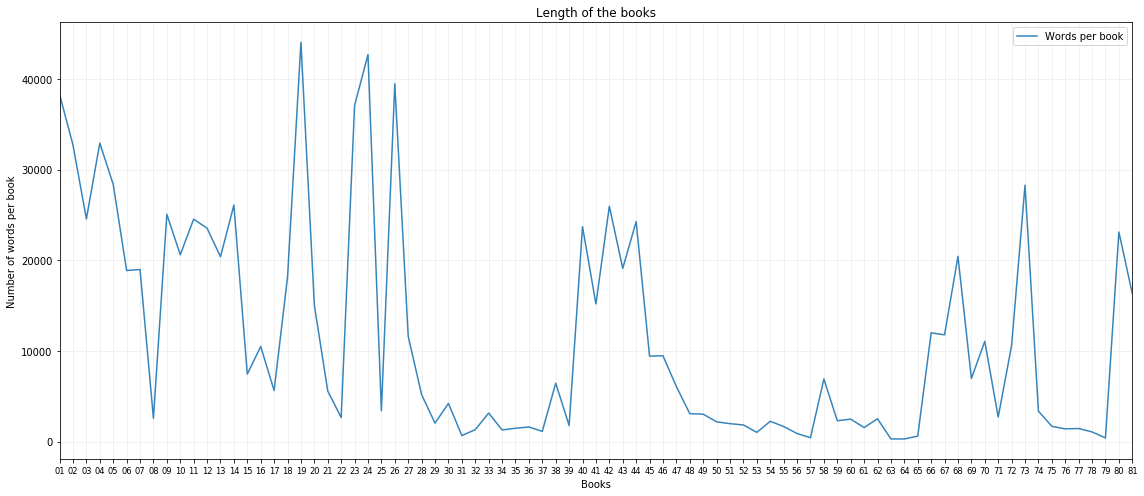

In [48]:
df = get_books(Bible)

title = "Length of the books"

fig, ax = plt.subplots(1, 1, figsize=(16,7)) 

occ = []
for idx, row in df.iterrows():
    text = row['text']
    occ.append(len(text.split(" ")))
ax.plot(list(range(len(occ))), occ, alpha=0.9)

ax.set_ylabel("Number of words per book")
ax.set_xlabel("Books")

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.book, size='small')
ax.set_xlim([0,80])

ax.legend(["Words per book"])
ax.set_title(title)
plt.grid(color="#EEEEEE")
plt.tight_layout()


plt.savefig("img/" + re.sub(" ","_",title) + ".svg")

In [39]:
def plot_kws(keywords, text, granularity, title, rel, save=True):
        
    if granularity == "b":
        df = get_books(text)
    elif granularity == "c":
        df = get_chapters(text)
    elif granularity == "p":
        df = get_paragraphs(text)
        
    if rel:
        title += " (relative frequency)"
        
    fig, ax = plt.subplots(1, 1, figsize=(16,7)) 
    for kw in keywords:
        occ = kw_occ(kw, df, rel)
        ax.plot(list(range(len(occ))), occ, alpha=0.9)
        
    if granularity == "b":
        if rel:
            ax.set_ylabel("Relative frequency per book")
        else:
            ax.set_ylabel("Mentions per book")
        ax.set_xlabel("Books")
    elif granularity == "c":
        if rel:
            ax.set_ylabel("Relative frequency per chapter")
        else:
            ax.set_ylabel("Mentions per chapter")
        ax.set_xlabel("Chapters")
    elif granularity == "p":
        if rel:
            ax.set_ylabel("Relative frequency per paragraph")
        else:
            ax.set_ylabel("Mentions per paragraph")
        ax.set_xlabel("Paragraphs")
        
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.book, size='small')
    ax.set_xlim([0,80])
    
    legend = []
    for kw in keywords:
        if type(kw) == str:
            legend.append(kw)
        else:
            legend.append(" OR ".join(kw))
    ax.legend(legend)
    ax.set_title(title)
    plt.grid(color="#EEEEEE")
    plt.tight_layout()
    
    if save:
        plt.savefig("img/" + re.sub(" ","_",title) + ".svg")

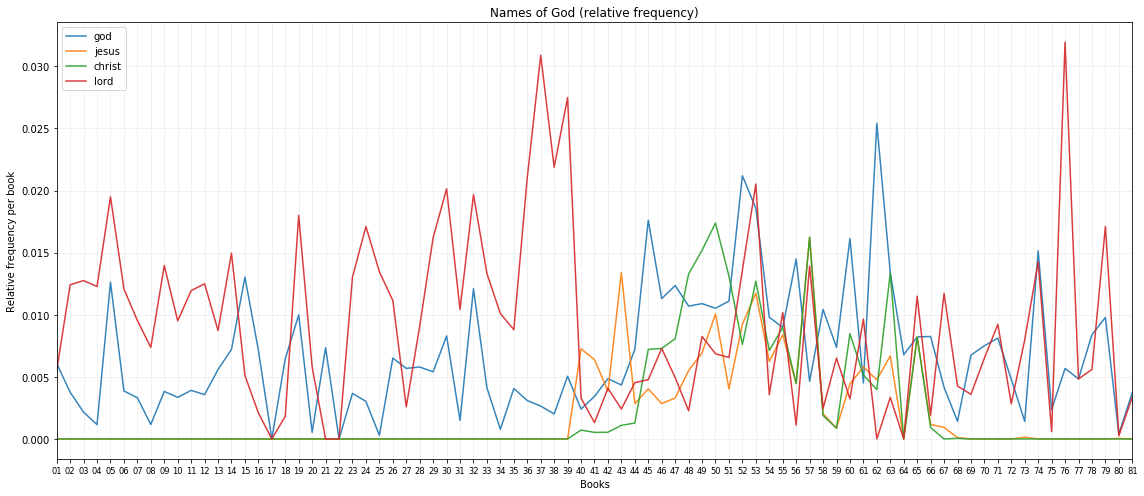

In [40]:
keywords = ["god", "jesus", "christ", "lord"]
plot_kws(keywords, Bible, "b", "Names of God", rel=True)

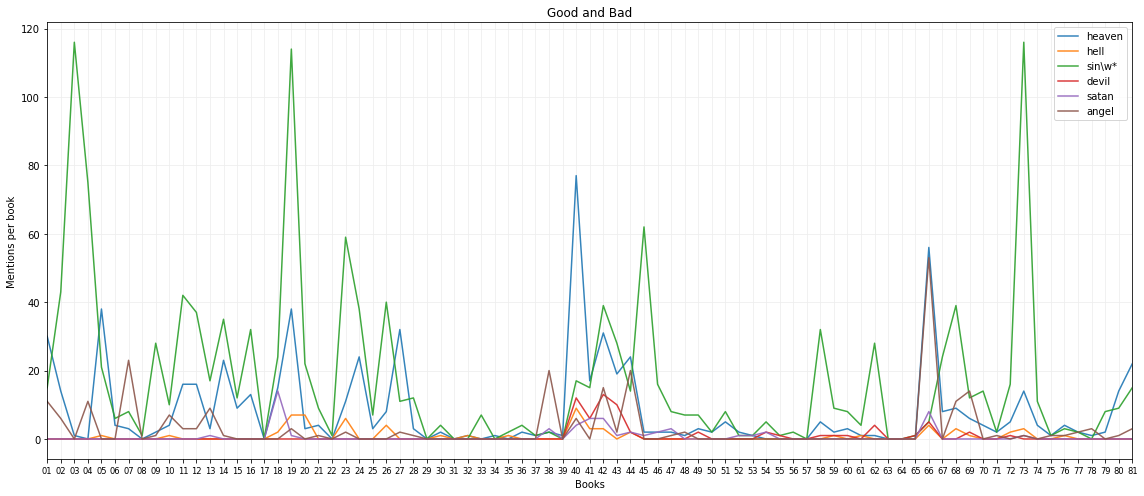

In [42]:
keywords = ["heaven", "hell", "sin\w*", "devil", "satan", "angel"]
plot_kws(keywords, Bible, "b", "Good and Bad", rel=False)

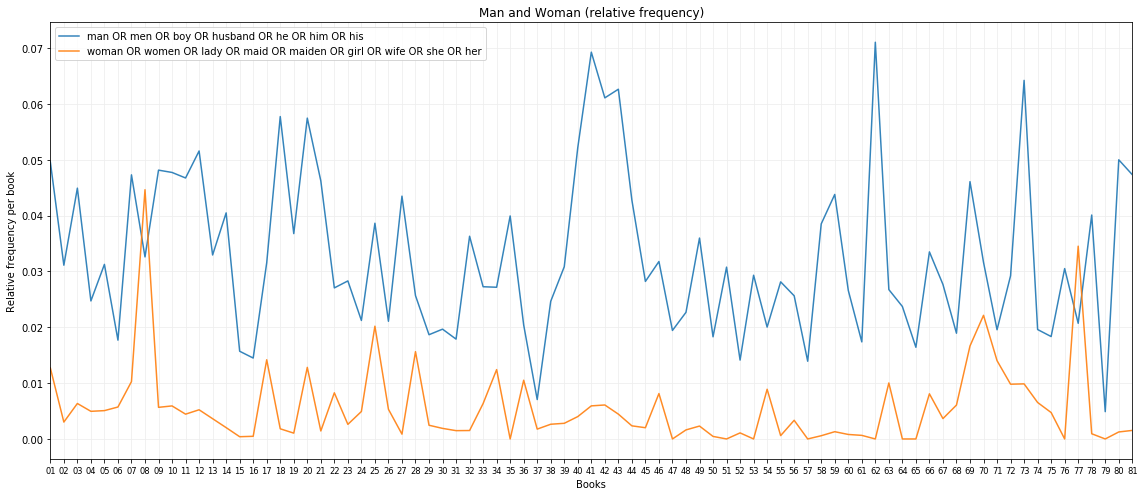

In [43]:
keywords = [["man","men","boy","husband","he","him","his"], 
            ["woman","women","lady","maid","maiden","girl","wife","she","her"]]
plot_kws(keywords, Bible, "b", "Man and Woman", rel=True)

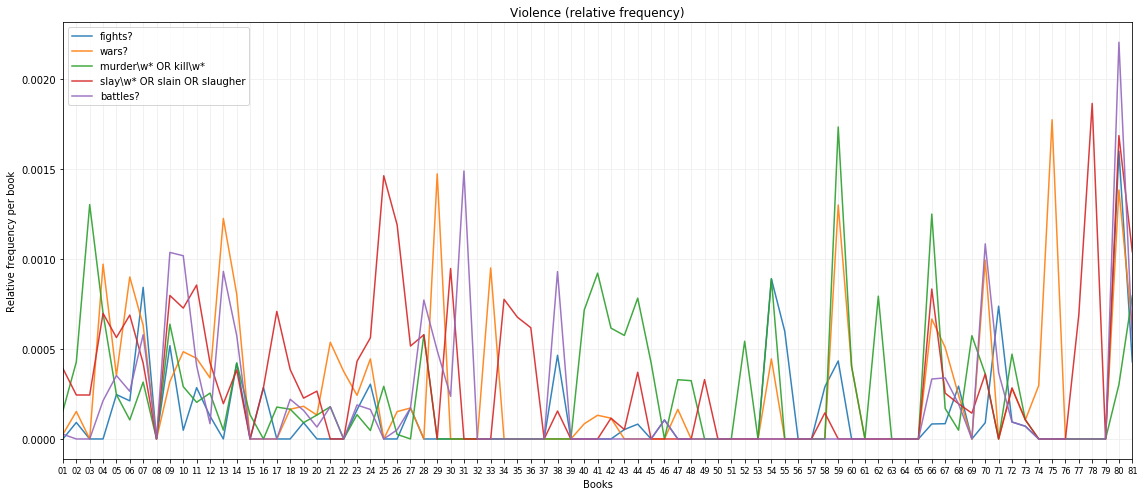

In [44]:
keywords = ["fights?", "wars?", ["murder\w*","kill\w*"], ["slay\w*","slain","slaugher"], "battles?"]
plot_kws(keywords, Bible, "b", "Violence", rel=True)

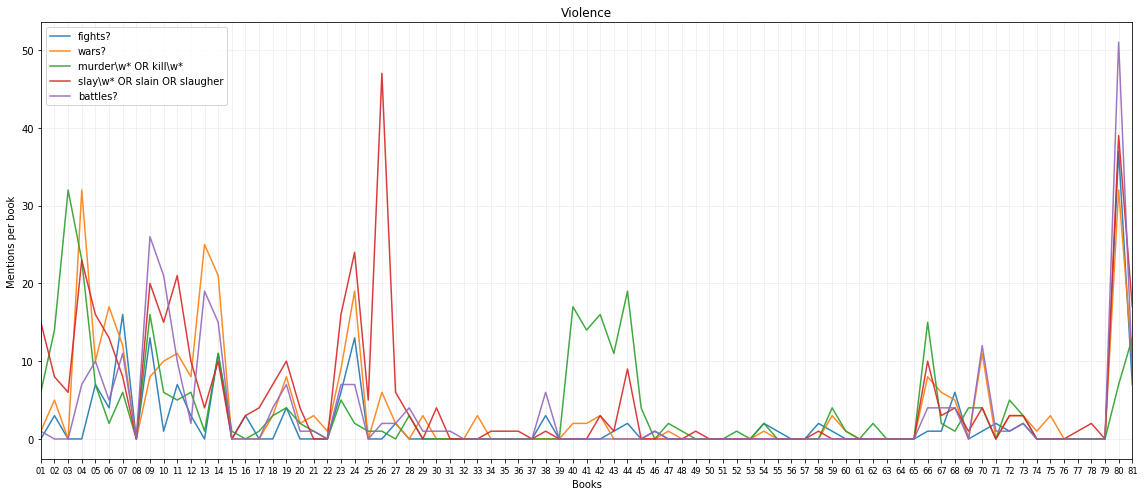

In [23]:
keywords = ["fights?", "wars?", ["murder\w*","kill\w*"], ["slay\w*","slain","slaugher"], "battles?"]
plot_kws(keywords, Bible, "b", "Violence", rel=False)

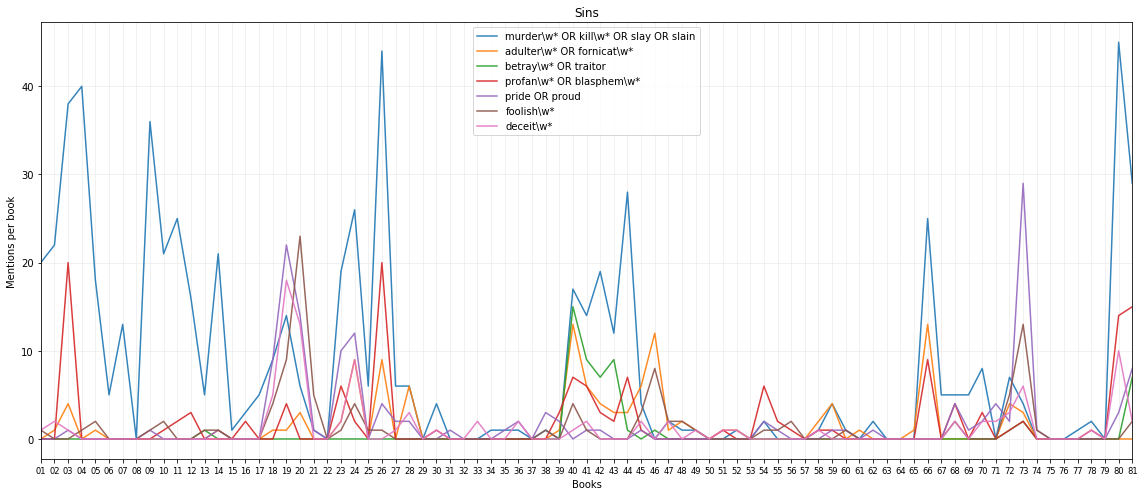

In [215]:
keywords = [
    ["murder\w*","kill\w*","slay","slain"],
    ["adulter\w*","fornicat\w*"],
    ["betray\w*","traitor"],
    ["profan\w*","blasphem\w*"],
#     ["wickedness","wicked"],
    ["pride","proud"],
    ["foolish\w*"],
    ["deceit\w*"],
#     ["greed"]
    
    
]
plot_kws(keywords, Bible, "b", "Sins")

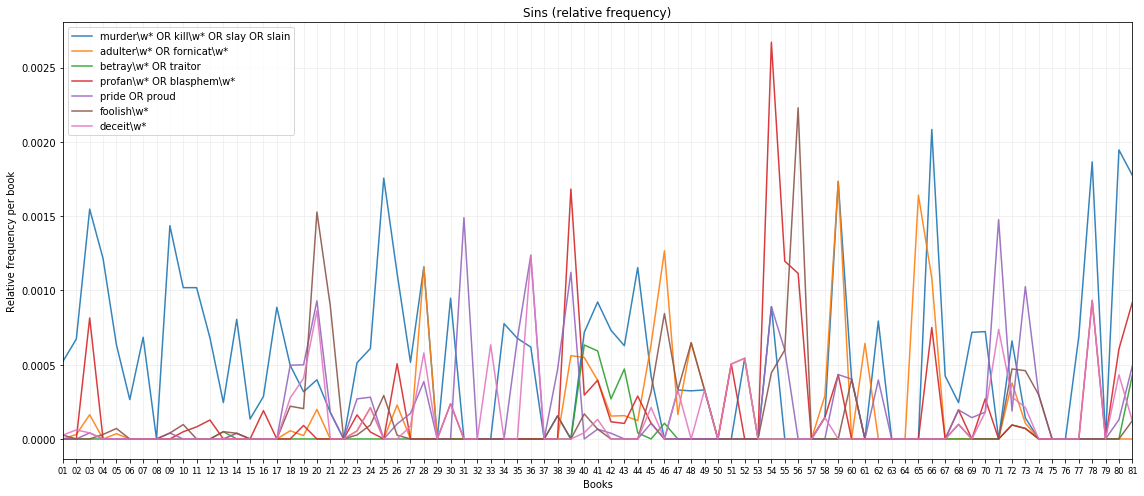

In [45]:
keywords = [
    ["murder\w*","kill\w*","slay","slain"],
    ["adulter\w*","fornicat\w*"],
    ["betray\w*","traitor"],
    ["profan\w*","blasphem\w*"],
#     ["wickedness","wicked"],
    ["pride","proud"],
    ["foolish\w*"],
    ["deceit\w*"],
#     ["greed"]
    
    
]
plot_kws(keywords, Bible, "b", "Sins", rel=True)

### Women names in the Bible

In [26]:
from bs4 import BeautifulSoup

In [27]:
with open("women_in_bible.html", 'r') as f:
    html_doc = f.read()

In [28]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [29]:
li = soup.select('h2 + ul li')

In [30]:
li[:5]

[<li><a href="/wiki/Abigail_(mother_of_Amasa)" title="Abigail (mother of Amasa)">Abigail</a> – mother of <a href="/wiki/Amasa" title="Amasa">Amasa</a>, Sister of <a href="/wiki/David" title="David">David</a>. <i>I Chronicles 2:15-17</i><sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></li>,
 <li><a href="/wiki/Abigail" title="Abigail">Abigail</a> – wife of the wicked <a href="/wiki/Nabal" title="Nabal">Nabal</a>, who became a wife of <a href="/wiki/David" title="David">David</a> after Nabal's death. <i>I Samuel 25</i><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup></li>,
 <li><a href="/wiki/Abihail" title="Abihail">Abihail</a> #1 – mother of <a class="mw-redirect" href="/wiki/Zuriel" title="Zuriel">Zuriel</a>. (Zuriel was the chief of the house of <a href="/wiki/Merari" title="Merari">Merari</a>). <i>Numbers 3:35</i><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></li>,
 <li><a href="/wiki/Abihail" title="A

In [31]:
female_names = list(set([re.findall(r"(^[\w]+)", l.text)[0].strip() for l in li]))

In [32]:
female_names

['Abigail',
 'Samaritan',
 'Atarah',
 'Tamar',
 'Joanna',
 'Merab',
 'Julia',
 'Rahab',
 'Ephrath',
 'Judith',
 'Zilpah',
 'Adah',
 'Hodesh',
 'Antiochus',
 'Junia',
 'Gomer',
 'Jezebel',
 'Chloe',
 'Haggith',
 'Rachel',
 'List',
 'Baara',
 'Elisabeth',
 'Hephziba',
 'Bithiah',
 'Keturah',
 'Sheerah',
 'Eunice',
 'Jerusha',
 'Achsah',
 'Jehoaddan',
 'Matred',
 'Hamutal',
 'Phoebe',
 'Salome',
 'Shelomit',
 'Zillah',
 'Martha',
 'Taphath',
 'Hushim',
 'Michal',
 'Hammolekheth',
 'Milcah',
 'Naomi',
 'Sarah',
 'Naarah',
 'Rhoda',
 'Hannah',
 'Ephah',
 'Puah',
 'Damaris',
 'Abishag',
 'Peninnah',
 'Female',
 'Jedidah',
 'Jemima',
 'Keziah',
 'Sapphira',
 'Eglah',
 'Ahlai',
 'Bernice',
 'Zipporah',
 'Timnah',
 'Orpah',
 'Noadiah',
 'Rebekah',
 'Lydia',
 'Susanna',
 'Mahlah',
 'Aholibamah',
 'Mehetabel',
 'Syntyche',
 'Deborah',
 'Jehosheba',
 'Reumah',
 'Priscilla',
 'Ahinoam',
 'Iscah',
 'Mahalath',
 'Dinah',
 'Euodia',
 'Basemeth',
 'Candace',
 'Tirzah',
 'Miriam',
 'Lois',
 'Zeresh',
 '

In [33]:
for n in ["List","Female","Me","Lo","Samaritan","Noah"]:
    female_names.remove(n)

In [34]:
female_names

['Abigail',
 'Atarah',
 'Tamar',
 'Joanna',
 'Merab',
 'Julia',
 'Rahab',
 'Ephrath',
 'Judith',
 'Zilpah',
 'Adah',
 'Hodesh',
 'Antiochus',
 'Junia',
 'Gomer',
 'Jezebel',
 'Chloe',
 'Haggith',
 'Rachel',
 'Baara',
 'Elisabeth',
 'Hephziba',
 'Bithiah',
 'Keturah',
 'Sheerah',
 'Eunice',
 'Jerusha',
 'Achsah',
 'Jehoaddan',
 'Matred',
 'Hamutal',
 'Phoebe',
 'Salome',
 'Shelomit',
 'Zillah',
 'Martha',
 'Taphath',
 'Hushim',
 'Michal',
 'Hammolekheth',
 'Milcah',
 'Naomi',
 'Sarah',
 'Naarah',
 'Rhoda',
 'Hannah',
 'Ephah',
 'Puah',
 'Damaris',
 'Abishag',
 'Peninnah',
 'Jedidah',
 'Jemima',
 'Keziah',
 'Sapphira',
 'Eglah',
 'Ahlai',
 'Bernice',
 'Zipporah',
 'Timnah',
 'Orpah',
 'Noadiah',
 'Rebekah',
 'Lydia',
 'Susanna',
 'Mahlah',
 'Aholibamah',
 'Mehetabel',
 'Syntyche',
 'Deborah',
 'Jehosheba',
 'Reumah',
 'Priscilla',
 'Ahinoam',
 'Iscah',
 'Mahalath',
 'Dinah',
 'Euodia',
 'Basemeth',
 'Candace',
 'Tirzah',
 'Miriam',
 'Lois',
 'Zeresh',
 'Jecholiah',
 'Delilah',
 'Medium',

In [35]:
genesis = get_books(Bible).loc[0]['text']

In [36]:
for n in female_names:
    found = re.findall(r"\b{}\b".format(n), genesis, re.IGNORECASE)
    print("{}: {}".format(n, len(found)))

Abigail: 0
Atarah: 0
Tamar: 6
Joanna: 0
Merab: 0
Julia: 0
Rahab: 0
Ephrath: 4
Judith: 1
Zilpah: 7
Adah: 8
Hodesh: 0
Antiochus: 0
Junia: 0
Gomer: 2
Jezebel: 0
Chloe: 0
Haggith: 0
Rachel: 44
Baara: 0
Elisabeth: 0
Hephziba: 0
Bithiah: 0
Keturah: 2
Sheerah: 0
Eunice: 0
Jerusha: 0
Achsah: 0
Jehoaddan: 0
Matred: 1
Hamutal: 0
Phoebe: 0
Salome: 0
Shelomit: 0
Zillah: 3
Martha: 0
Taphath: 0
Hushim: 1
Michal: 0
Hammolekheth: 0
Milcah: 7
Naomi: 0
Sarah: 37
Naarah: 0
Rhoda: 0
Hannah: 0
Ephah: 1
Puah: 0
Damaris: 0
Abishag: 0
Peninnah: 0
Jedidah: 0
Jemima: 0
Keziah: 0
Sapphira: 0
Eglah: 0
Ahlai: 0
Bernice: 0
Zipporah: 0
Timnah: 1
Orpah: 0
Noadiah: 0
Rebekah: 30
Lydia: 0
Susanna: 0
Mahlah: 0
Aholibamah: 7
Mehetabel: 1
Syntyche: 0
Deborah: 1
Jehosheba: 0
Reumah: 1
Priscilla: 0
Ahinoam: 0
Iscah: 1
Mahalath: 1
Dinah: 8
Euodia: 0
Basemeth: 0
Candace: 0
Tirzah: 0
Miriam: 0
Lois: 0
Zeresh: 0
Jecholiah: 0
Delilah: 0
Medium: 0
Shiphrah: 0
Abital: 0
Athaliah: 0
Leah: 33
Dorcas: 0
Jael: 0
Tabitha: 0
Naamah: 1
H

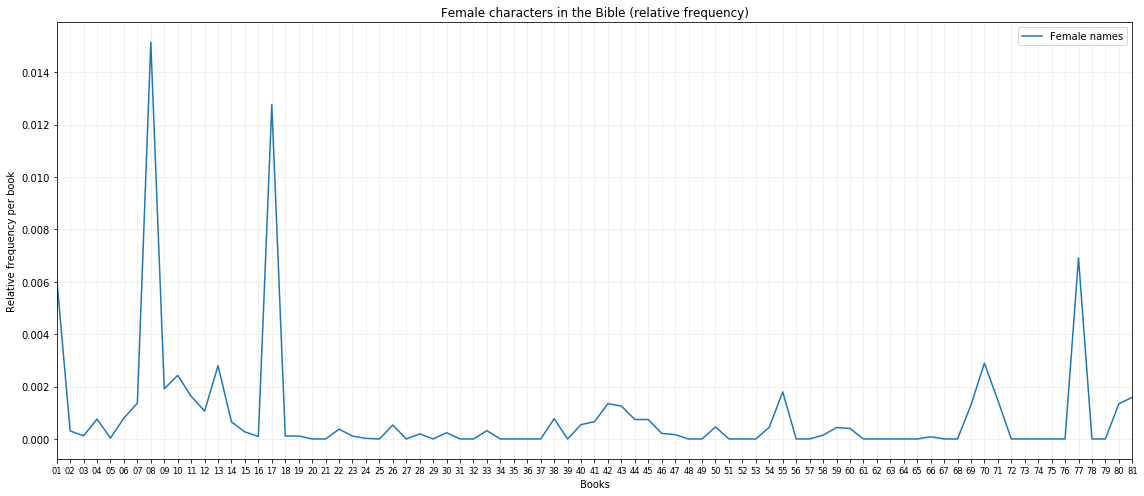

In [37]:
df = get_books(Bible)

fig, ax = plt.subplots(1, 1, figsize=(16,7)) 
for kw in [female_names]:
    occ = kw_occ(kw, df, rel=True)
    ax.plot(list(range(len(occ))), occ)

ax.set_ylabel("Relative frequency per book")
ax.set_xlabel("Books")

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.book, size='small')
ax.set_xlim([0,80])

title = "Female characters in the Bible (relative frequency)"
    
ax.legend(["Female names"])
ax.set_title(title)
plt.grid(color="#EEEEEE")
plt.tight_layout()


plt.savefig("img/" + re.sub(" ","_",title) + ".svg")

# Gospel analysis

In [24]:
Matthew = Bible[Bible.book == "40"]
Mark = Bible[Bible.book == "41"]
Luke = Bible[Bible.book == "42"]
John = Bible[Bible.book == "43"]

In [28]:
def plot_kws_gospel(keywords, granularity, title, save=True):
        
    if granularity == "b":
        df_matthew = get_books(Matthew)
        df_mark = get_books(Mark)
        df_luke = get_books(Luke)
        df_john = get_books(John)
    elif granularity == "c":
        df_matthew = get_chapters(Matthew)
        df_mark = get_chapters(Mark)
        df_luke = get_chapters(Luke)
        df_john = get_chapters(John)
    elif granularity == "p":
        df_matthew = get_paragraphs(Matthew)
        df_mark = get_paragraphs(Mark)
        df_luke = get_paragraphs(Luke)
        df_john = get_paragraphs(John)
        
    gospel = {
        "Matthew": df_matthew,
        "Mark": df_mark,
        "Luke": df_luke,
        "John": df_john
    }
        
    fig, axes = plt.subplots(4, 1, figsize=(17,8)) 
    count = 0
    limits = [0,0,0,0]
    for apostle in gospel:
        df = gospel[apostle]
        for kw in keywords:
            occ = kw_occ(kw, df)
            limits[count] = max(limits[count], max(occ))
            axes[count].plot(list(range(len(occ))), occ, alpha=0.7)
        if granularity == "b":
            axes[count].set_ylabel("Mentions per book")
#             axes[count].set_xlabel("Books")
            axes[count].set_xticks([])
            axes[count].set_xlim([0, len(df)-1])
#             axes[count].set_xticklabels(df.book, size='small')
        elif granularity == "c":
            axes[count].set_ylabel("Mentions per chapter")
#             axes[count].set_xlabel("Chapters")
            axes[count].set_xticks([])
            axes[count].set_xlim([0, len(df)-1])
#             axes[count].set_xticklabels(df.chapter, size='small')
        elif granularity == "p":
            axes[count].set_ylabel("Mentions per paragraph")
#             axes[count].set_xlabel("Chapters")
            axes[count].set_xticks([])
            axes[count].set_xlim([0, len(df)-1])
#             axes[count].set_xticklabels(df.paragraph, size='small')
        
        legend = []
        for kw in keywords:
            if type(kw) == str:
                legend.append(kw)
            else:
                legend.append(" OR ".join(kw))
        axes[count].legend(legend)
        axes[count].set_title(apostle)
        count += 1
    for ax in axes:
        ax.set_ylim([0, max(limits)+1])
#     fig.suptitle(title, fontsize=28)
        ax.grid(color="#EEEEEE")
    plt.tight_layout()
    
    if save:
        plt.savefig("img/" + re.sub(" ","_",title))

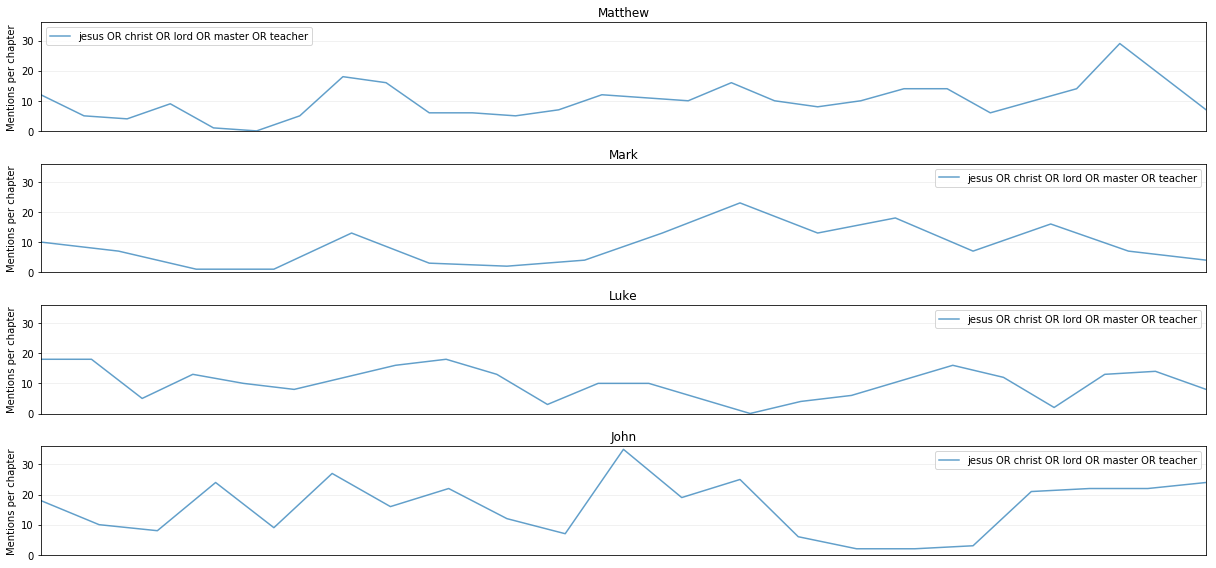

In [29]:
keywords = [["jesus", "christ","lord","master","teacher"]]
plot_kws_gospel(keywords, "c", "Jesus in Gospel")

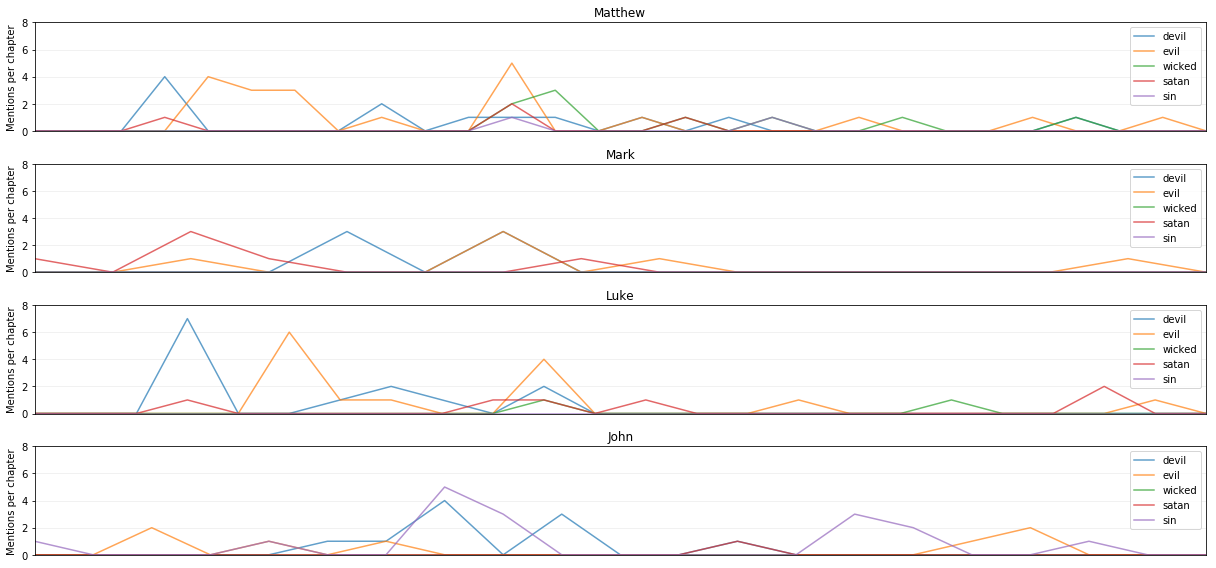

In [50]:
keywords = ["devil","evil","wicked","satan","sin"]
plot_kws_gospel(keywords, "c", "Evil in Gospel", save=True)

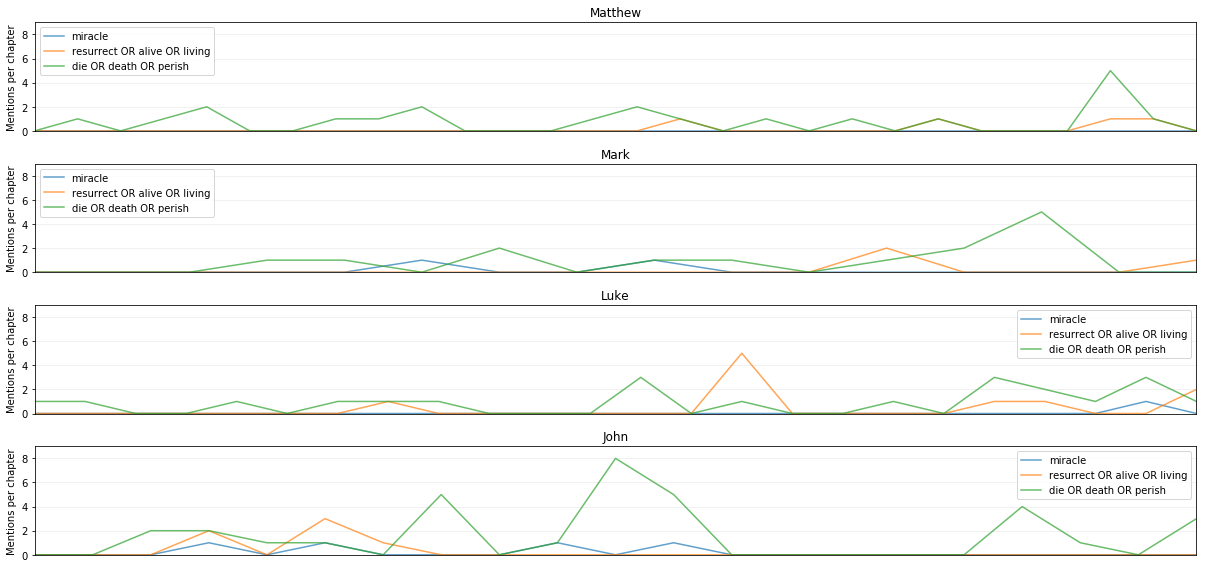

In [52]:
keywords = ["miracle",["resurrect","alive","living"],["die","death","perish"]]
plot_kws_gospel(keywords, "c", "Jesus in Gospel", save=False)

***

# Words associated with God

In [32]:
import spacy
from collections import defaultdict, OrderedDict
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/home/machaerus/.miniconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/machaerus/.miniconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/machaerus/.miniconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/machaerus/.miniconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [33]:
stops = []
with open("stop.txt",'r') as f:
    for line in f:
        stops.append(line.strip())

In [34]:
nlp = spacy.load('en_core_web_lg')

/home/machaerus/.miniconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/machaerus/.miniconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [35]:
paragraphs = []
for p in nlp.pipe(Bible.text, batch_size=1000):
    paragraphs.append(p)

In [36]:
Bible['spacy_docs'] = paragraphs

In [37]:
Bible.head()

book chapter paragraph short_name  \
0   01     001       001    Genesis   
1   01     001       002    Genesis   
2   01     001       003    Genesis   
3   01     001       004    Genesis   
4   01     001       005    Genesis   

                                                text  \
0  In the beginning God created the heaven and th...   
1  And the earth was without form, and void; and ...   
2  And God said, Let there be light: and there wa...   
3  And God saw the light, that [it was] good: and...   
4  And God called the light Day, and the darkness...   

                                          spacy_docs  
0  (In, the, beginning, God, created, the, heaven...  
1  (And, the, earth, was, without, form, ,, and, ...  
2  (And, God, said, ,, Let, there, be, light, :, ...  
3  (And, God, saw, the, light, ,, that, [, it, wa...  
4  (And, God, called, the, light, Day, ,, and, th...

In [38]:
type(next(Bible.iloc[0]["spacy_docs"].sents))

spacy.tokens.span.Span

In [39]:
vader = SentimentIntensityAnalyzer()

In [40]:
vader.polarity_scores("Score this fucking text.")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [217]:
def tokens_and_sentiments(keyword, text):
    tokens = {
        book_n: defaultdict(int) for book_n in text.book.unique()
    }
    sentiments = {
        book_n: [] for book_n in text.book.unique()
    }

    for idx, row in text.iterrows():
        book_n = row['book']
        doc = row['spacy_docs']
        for sent in doc.sents:
            if len(re.findall(r"\b{}\b".format(keyword), sent.text, re.IGNORECASE)) > 0:
                sentiments[book_n].append(vader.polarity_scores(sent.text)['compound'])
                for token in sent:
                    if (not token.is_punct 
                        and not token.is_stop 
                        and token.lemma_ not in stops 
                        and token.lemma_ not in ["-PRON-","'s","thou","thee","thy","ye","hath","saith"]):
                        tokens[book_n][token.lemma_] += 1

    for key in tokens.keys():
        tokens[key] = list(OrderedDict(sorted(tokens[key].items(), key=lambda x: x[1], reverse=True)).items())
    for key in sentiments.keys():
        if len(sentiments[key]) > 1:
            sentiments[key] = np.mean(sentiments[key])
        else:
            sentiments[key] = 0
            
    return tokens, sentiments

In [218]:
def plot_sentiment(sentiments, labels, text, title, save=True):
    fig, ax = plt.subplots(1, 1, figsize=(18,5)) 
    for i in range(len(sentiments)):
        ax.plot(sentiments[i].values(), alpha=0.9)
    ax.set_xticks(range(len(text.book.unique())))
    ax.set_xticklabels(text.book.unique(), size='small')
    ax.set_xlim([0,80])
    ax.legend(labels)
    ax.set_title(title)
    ax.grid(color="#EEEEEE")
    plt.tight_layout()
    if save:
        plt.savefig("img/" + re.sub(" ","_",title) + ".svg")

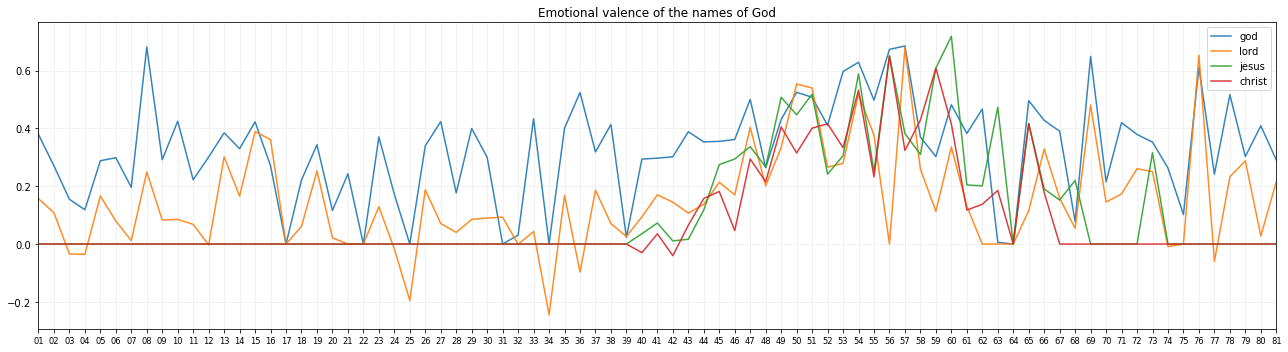

In [219]:
keywords = ["god","lord","jesus","christ"]

sentiments = []
for keyword in keywords:
    t, s = tokens_and_sentiments(keyword, Bible)
    sentiments.append(s)
    
plot_sentiment(sentiments, keywords, Bible, "Emotional valence of the names of God")

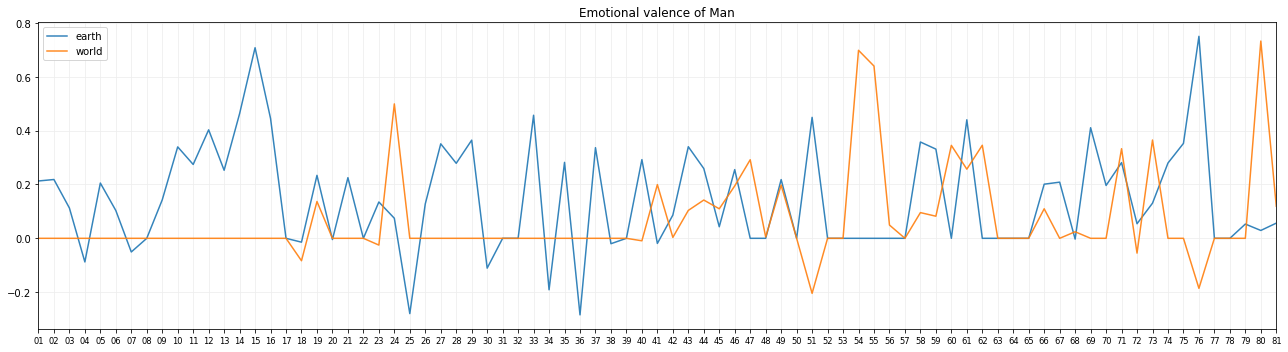

In [148]:
keywords = ["earth","world"]

sentiments = []
for keyword in keywords:
    t, s = tokens_and_sentiments(keyword, Bible)
    sentiments.append(s)
    
plot_sentiment(sentiments, keywords, Bible, "Emotional valence of Man", save=False)